<a href="https://colab.research.google.com/github/katetarasenko/Kurs_4_Practical_6_Tarasenko_Yekateryna/blob/main/Practical_6_FIT_4_10_Tarasenko_Yekateryna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Обрати датасет та завантажити

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
california_housing = fetch_california_housing()

df = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Розділити на тренувальну вибірку та тестувалну вибірку у співвідношенні 80\20

In [7]:
df['target'] = california_housing.target

X_train, X_test, y_train, y_test = train_test_split(
    california_housing.data, california_housing.target, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.5558915986952422
R² Score: 0.5757877060324524


MSE - демонструє квадрат різниці між передаченим значеням та реальним значенням,усередненний по всьому набору даних, які має передбачити модель. є порівняно близькою до бажанного значеня, бажаним значенням є 0, що вказуватиме на ідеальне передбачення моделлю всіх значень. чим більшим є значення mse тим сильнішим є розкид значень між передбаченим та реальним.

R^2 -  is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit). Значення може змінюватися від 0 до 1( 1- модель ідеально передбачає значення, 0 - модель не пояснює жодної варіації) в цьому випадку виходить, що 57 відсотків значеннь пояснюються моделлю, що є порівняно непоганим значенням, але є місце для покращення.

Аналіз перенавчання:
Перевірте наявність перенавчання, порівнюючи результати на навчальній та тестовій вибірках. Якщо модель показує значно кращі результати на навчальних даних, це може свідчити про перенавчання.


In [9]:
y_train_pred = model.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Навчальна вибірка - MSE: {mse_train:.4f}, R^2: {r2_train:.4f}")
print(f"Тестова вибірка - MSE: {mse:.4f}, R^2: {r2:.4f}")

Навчальна вибірка - MSE: 0.5179, R^2: 0.6126
Тестова вибірка - MSE: 0.5559, R^2: 0.5758


Запобігання перенавчанню:
Введіть регуляризацію: використайте моделі з регуляризацією, такі як Ridge Regression або Lasso Regression.
Перевірте роботу моделі з різними значеннями параметра регуляризації та виберіть оптимальне значення.
Застосуйте крос-валідацію для більш стабільної оцінки продуктивності моделі.

In [10]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [13]:
import numpy as np

Ridge

In [14]:
ridge_params = {'alpha': np.logspace(-3, 3, 100)}

ridge = Ridge()

ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2', n_jobs=-1)
ridge_cv.fit(X_train, y_train)

print(f"Найкраще alpha для Ridge: {ridge_cv.best_params_['alpha']}")
print(f"Найкращий R^2 на крос-валідації: {ridge_cv.best_score_:.4f}")


Найкраще alpha для Ridge: 8.697490026177835
Найкращий R^2 на крос-валідації: 0.6115


In [16]:
y_pred_ridge = ridge_cv.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge MSE: {mse_ridge}")
print(f"Ridge R² Score: {r2_ridge}")

Ridge MSE: 0.5551476826677844
Ridge R² Score: 0.5763554036290124


Lasso

In [17]:
from sklearn.linear_model import Lasso

In [19]:
alpha_values = {'alpha': np.logspace(-3, 1, 100)}
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, alpha_values, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)

best_alpha_lasso = lasso_cv.best_params_['alpha']
print(f"Найкраще значення alpha для Lasso: {best_alpha_lasso}")

Найкраще значення alpha для Lasso: 0.001


In [20]:
y_pred_lasso = lasso_cv.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso MSE: {mse_lasso}")
print(f"Lasso R² Score: {r2_lasso}")

Lasso MSE: 0.5538940157172418
Lasso R² Score: 0.5773121026225017


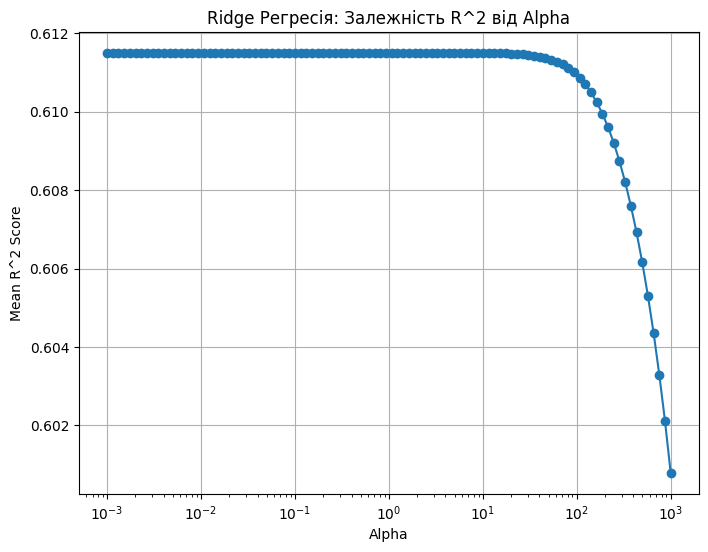

In [21]:

import matplotlib.pyplot as plt

# Отримання результатів GridSearchCV
ridge_alphas = ridge_cv.cv_results_['param_alpha'].data
ridge_scores = ridge_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.semilogx(ridge_alphas, ridge_scores, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean R^2 Score')
plt.title('Ridge Регресія: Залежність R^2 від Alpha')
plt.grid(True)
plt.show()

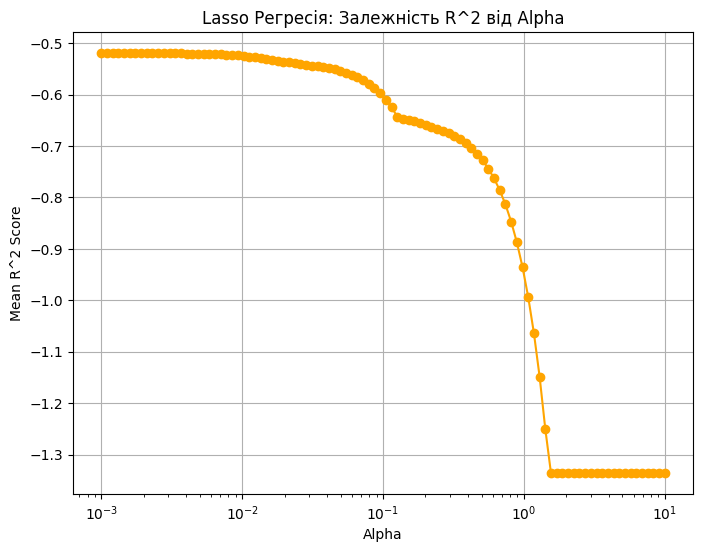

In [22]:
lasso_alphas = lasso_cv.cv_results_['param_alpha'].data
lasso_scores = lasso_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.semilogx(lasso_alphas, lasso_scores, marker='o', color='orange')
plt.xlabel('Alpha')
plt.ylabel('Mean R^2 Score')
plt.title('Lasso Регресія: Залежність R^2 від Alpha')
plt.grid(True)
plt.show()


Завдання 2. Виконати кластерізацію даних. Затосувати метод ліктя або метод силуєтів. Зробити візуалізацію кластерів. Зробити висновки

In [23]:

from sklearn.datasets import load_iris

In [24]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

print(X.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

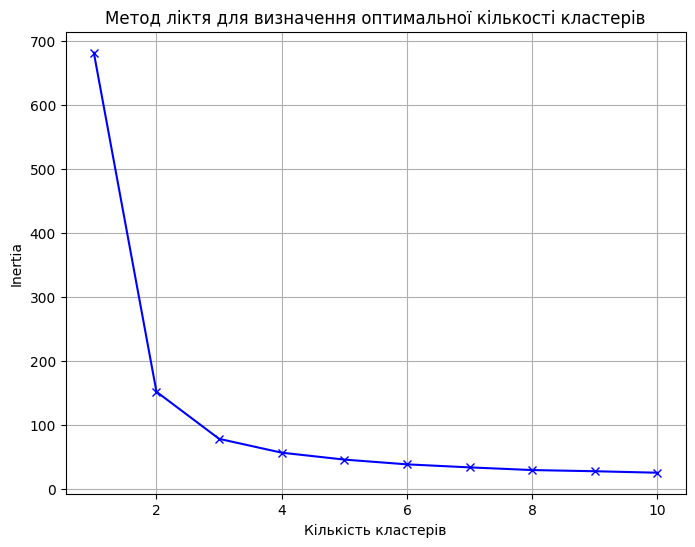

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Застосування методу ліктя для визначення оптимальної кількості кластерів
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Побудова графіка методу ліктя
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.grid(True)
plt.show()

In [26]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

X['Cluster'] = kmeans.labels_

print(X.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


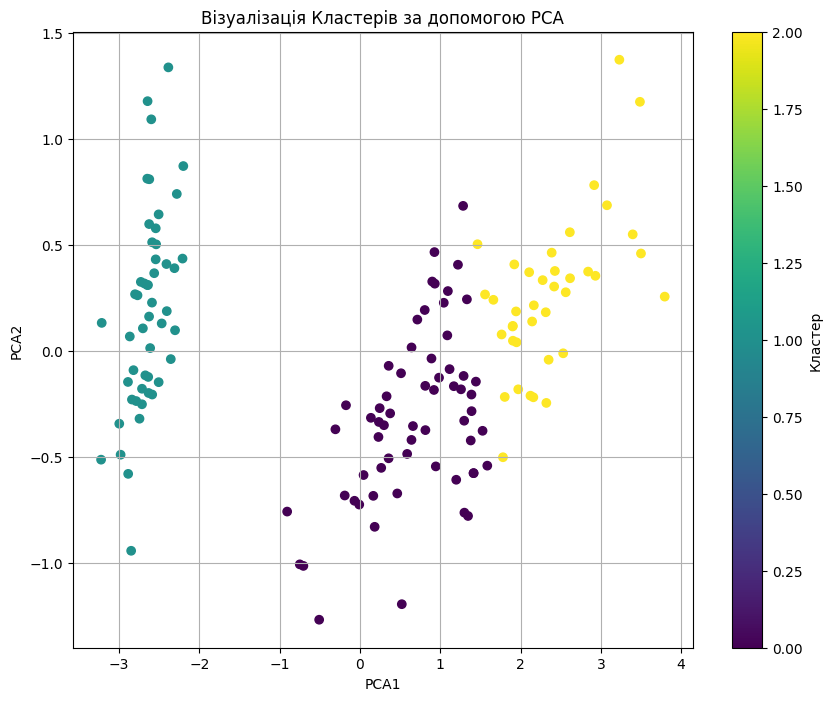

In [27]:

from sklearn.decomposition import PCA

# Застосування PCA для зменшення розмірності до 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.iloc[:, :-1])

# Додавання результатів PCA до DataFrame
X['PCA1'] = X_pca[:, 0]
X['PCA2'] = X_pca[:, 1]

# Візуалізація кластерів
plt.figure(figsize=(10, 8))
plt.scatter(X['PCA1'], X['PCA2'], c=X['Cluster'], cmap='viridis', marker='o')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Візуалізація Кластерів за допомогою PCA')
plt.colorbar(label='Кластер')
plt.grid(True)
plt.show()